# Final Project - Richie Rizal Amir (PYTN043ONL004)  Hacktiv8

## San fransisco crime data Classification

## IMPORT

#### Importing libraries

In [68]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import tree

#### Importing data

In [5]:
df = pd.read_csv('data/train.csv')

## EDA

In [3]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


#### Indentifie null columns

In [14]:
print('Number of null column in Category : ',len(df[df['Category'].isnull()]))

Number of null column in Category :  0


In [15]:
df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

#### Identifies all Category

In [17]:
df['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [19]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


#### Convert time to date hour minute month and year to new features

In [21]:
# function to convert datetime to become new feature
def convert_datetime(df):
    df['Dates'] = pd.to_datetime(df['Dates'])
    df['Date'] = df['Dates'].dt.date
    df['Hour'] = df['Dates'].dt.hour
    df['Minute'] = df['Dates'].dt.minute
    df['DayOfWeek'] = df['Dates'].dt.weekday
    df['Month'] = df['Dates'].dt.month
    df['Year'] = df['Dates'].dt.year
    
    return df

#### Add new feature to current df

In [22]:
df = convert_datetime(df)

#### Checking id there is error while converting dates

In [23]:
print('Number of errors :',len(df[df['Dates'].isnull()]))

Number of errors : 0


#### Plotting

Text(0.5, 0, 'Percentage')

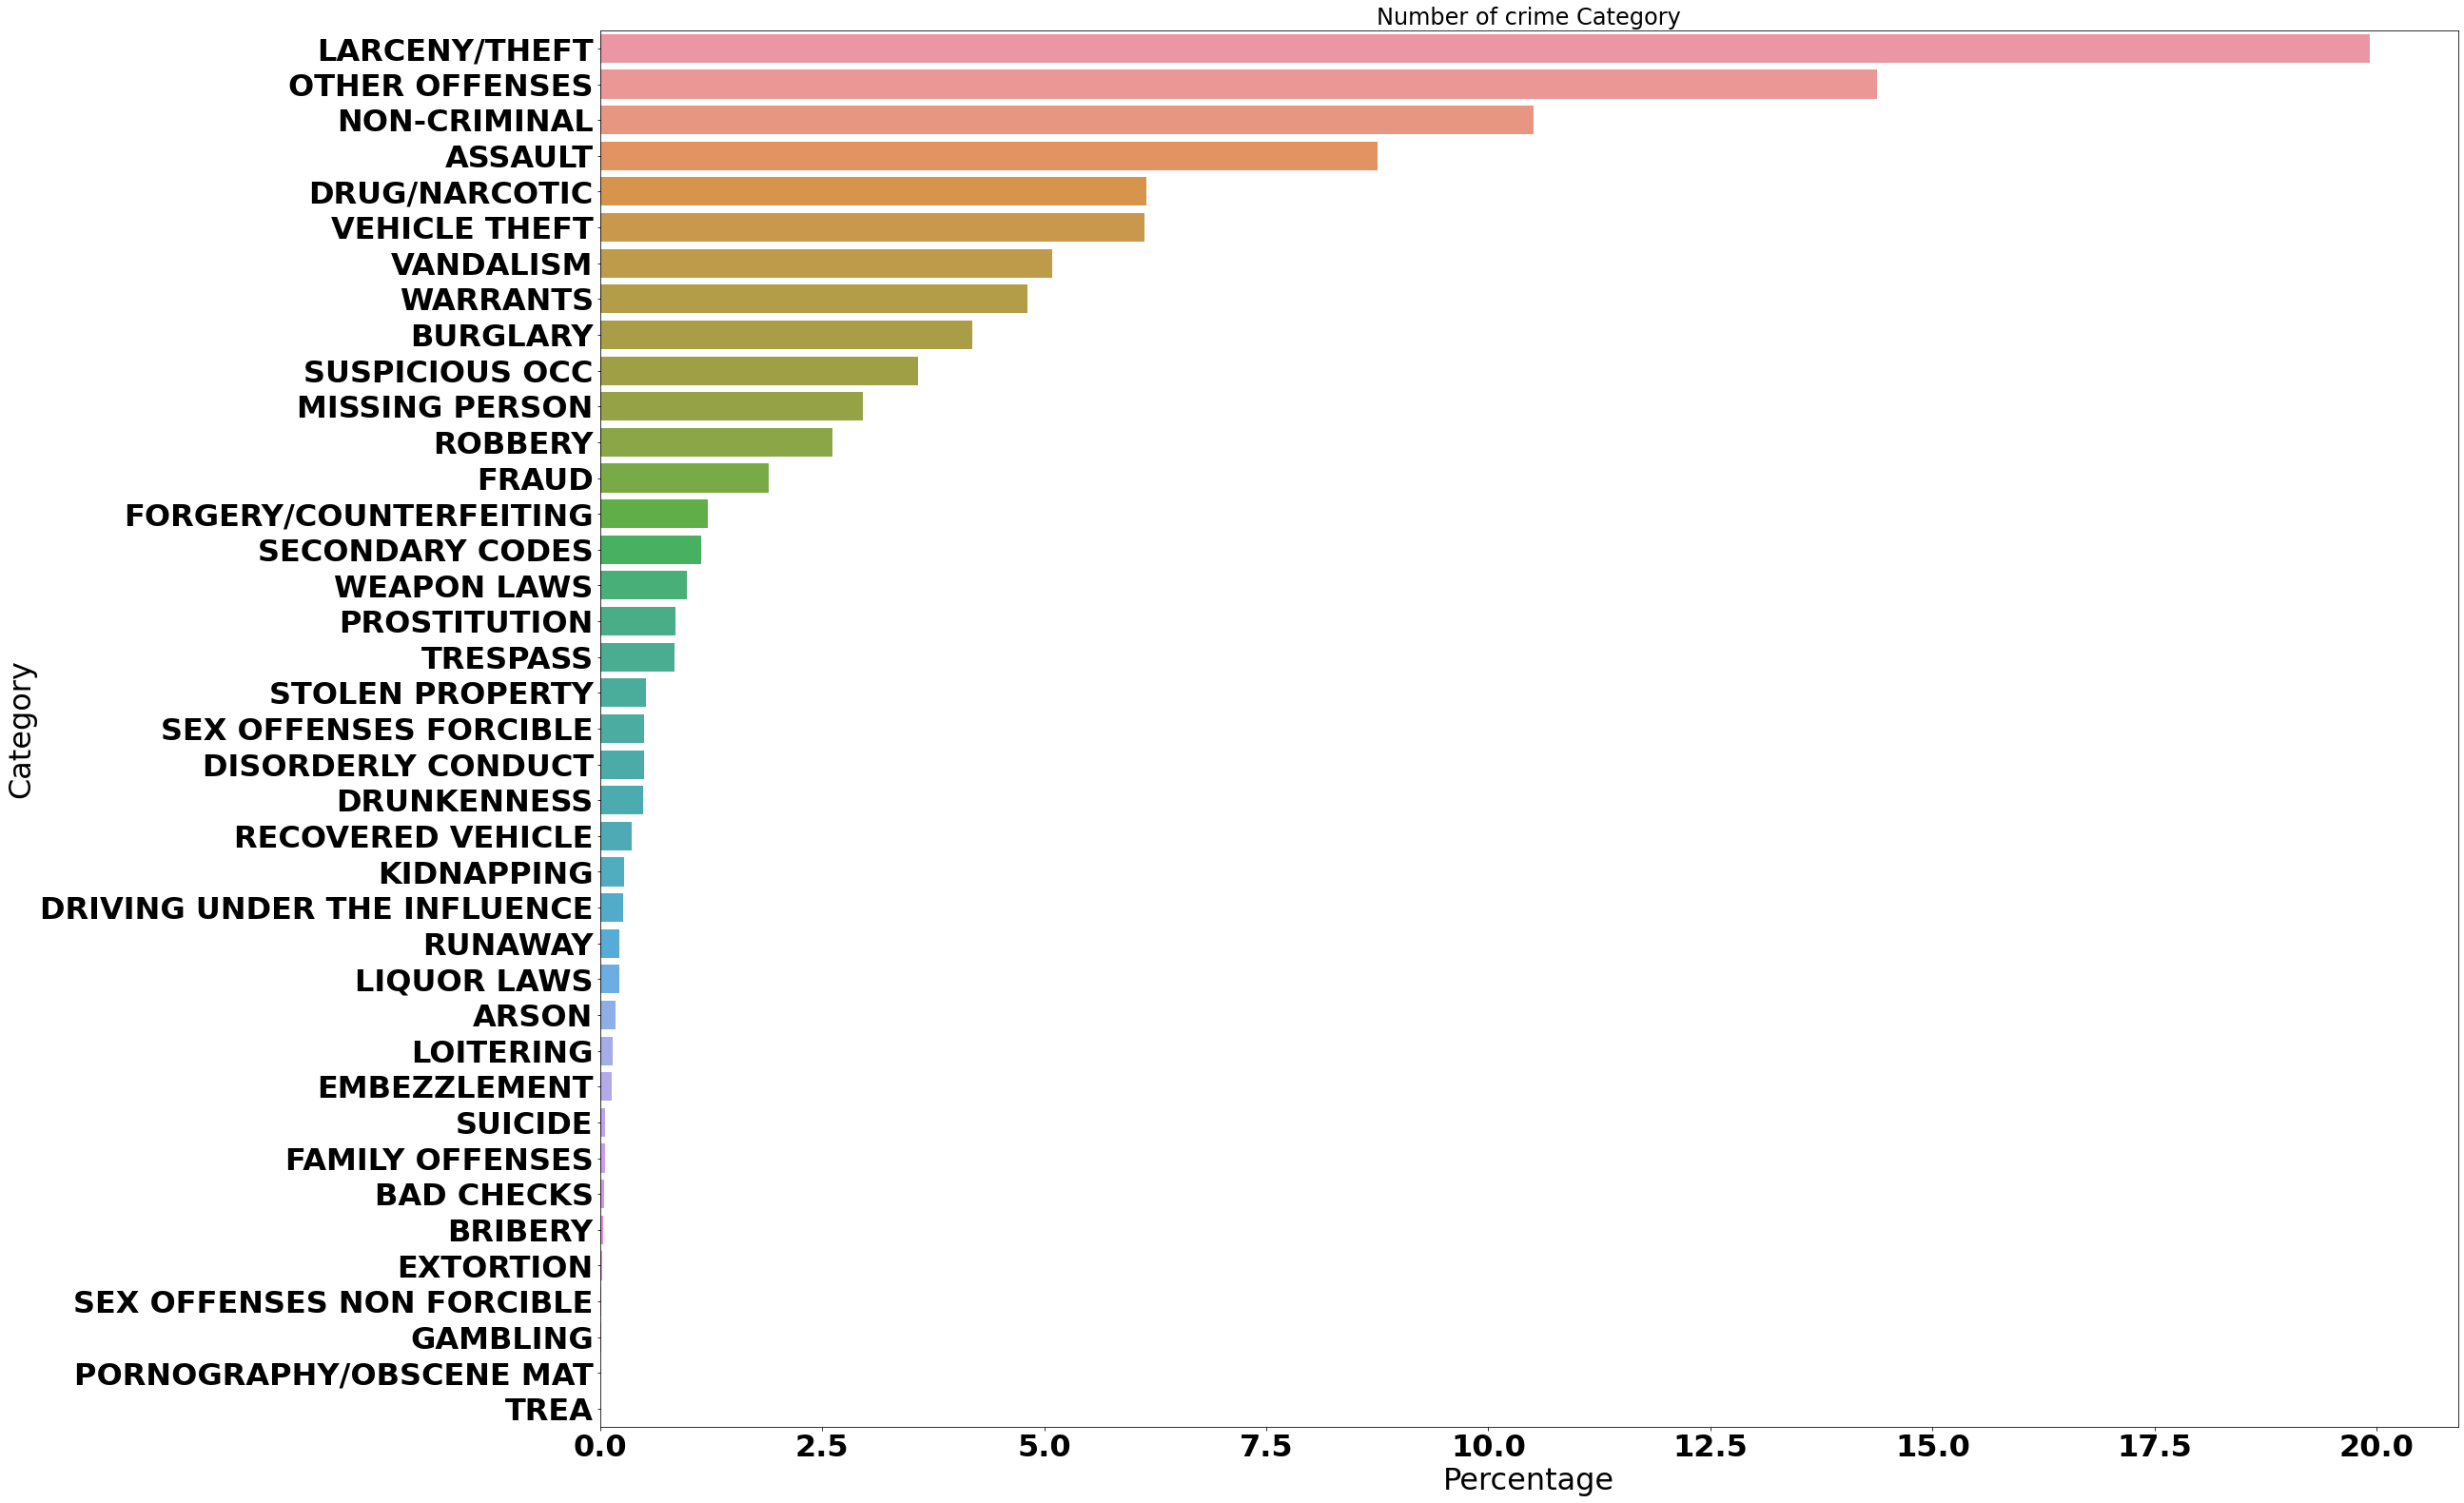

In [28]:
data = df.groupby('Category').count()
data = data['Dates'].sort_values(ascending=False)

plt.figure(figsize=(35, 27))
ax = sns.barplot((data.values / data.values.sum()) * 100,data.index)

plt.title('Number of crime Category', fontdict={'fontsize': 24})
plt.xlabel('Percentage')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


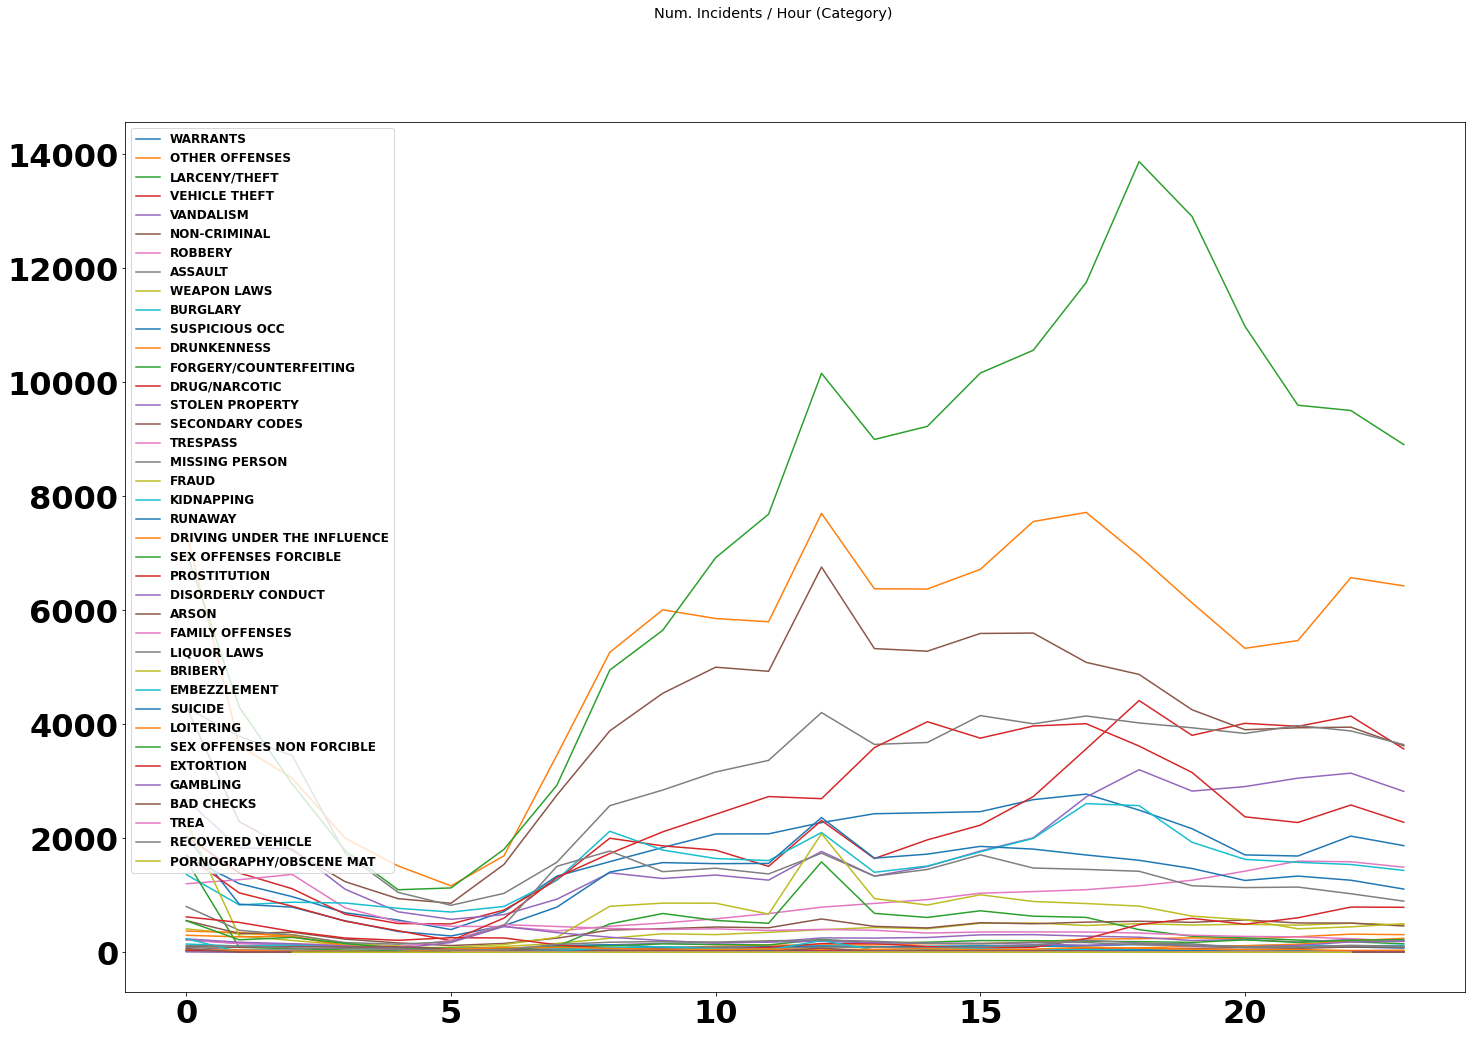

In [32]:
fig, ax = plt.subplots(figsize=(24,16))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

import matplotlib
matplotlib.rc('font', **font)

fig.suptitle('Num. Incidents / Hour (Category)')
for category in df['Category'].unique():
    #print(category)
    data = df[df['Category'] == category].groupby('Hour')
    a = data['Hour'].count()
    ax.plot(a.index, data['Hour'].count(), label=category)
    
plt.legend()

plt.show()

In [82]:
sf_lat = 37.7749
sf_long = -122.4194
state_geo = 'data/san-francisco.geojson'

m = folium.Map(location=[sf_lat,sf_long], zoom_start=12)
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    fill_color='BuPu',
    fill_opacity=0.3,
    line_opacity=0.8
).add_to(m)

folium.LayerControl().add_to(m)

for index, row in df.iterrows():
#     print(feature['geometry']['coordinates'][0][0])
    
    folium.CircleMarker(
        [row['Y'], row['X']],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)
m

KeyboardInterrupt: 

#### Drop unnecessary columns 

In [36]:
if 'Descript' in df:
    df = df.drop(['Descript'], axis=1)
if 'Resolution' in df:
    df = df.drop(['Resolution'], axis=1)
#dropping address cause we have longitude and latitude
if 'Address' in df:
    df = df.drop(['Address'], axis=1)

### Data preprocessing

In [37]:
df.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y,Date,Hour,Minute,Month,Year
0,2015-05-13 23:53:00,WARRANTS,2,NORTHERN,-122.425892,37.774599,2015-05-13,23,53,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,2,NORTHERN,-122.425892,37.774599,2015-05-13,23,53,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,2,NORTHERN,-122.424363,37.800414,2015-05-13,23,33,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,2,NORTHERN,-122.426995,37.800873,2015-05-13,23,30,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,2,PARK,-122.438738,37.771541,2015-05-13,23,30,5,2015


#### drop unprocesable data like dates

In [38]:
if 'Dates' in df:
    df = df.drop(['Dates'], axis=1)
if 'Date' in df:
    df = df.drop(['Date'], axis=1)
if 'Year' in df:
    df = df.drop(['Year'], axis=1)

df.head()

,Category,DayOfWeek,PdDistrict,X,Y,Hour,Minute,Month
0,WARRANTS,2,NORTHERN,-122.425892,37.774599,23,53,5
1,OTHER OFFENSES,2,NORTHERN,-122.425892,37.774599,23,53,5
2,OTHER OFFENSES,2,NORTHERN,-122.424363,37.800414,23,33,5
3,LARCENY/THEFT,2,NORTHERN,-122.426995,37.800873,23,30,5
4,LARCENY/THEFT,2,PARK,-122.438738,37.771541,23,30,5


#### Convert categorical value to numeric using Label encoder

In [40]:
df_col = ['Category','PdDistrict']
le = LabelEncoder()
for i in df_col:
    df[i] = le.fit_transform(df[i])
df.head()

,Category,DayOfWeek,PdDistrict,X,Y,Hour,Minute,Month
0,37,2,4,-122.425892,37.774599,23,53,5
1,21,2,4,-122.425892,37.774599,23,53,5
2,21,2,4,-122.424363,37.800414,23,33,5
3,16,2,4,-122.426995,37.800873,23,30,5
4,16,2,5,-122.438738,37.771541,23,30,5


#### Spliting test and train data

In [41]:
X = df.drop(['Category'],axis=1)
X.head()

,DayOfWeek,PdDistrict,X,Y,Hour,Minute,Month
0,2,4,-122.425892,37.774599,23,53,5
1,2,4,-122.425892,37.774599,23,53,5
2,2,4,-122.424363,37.800414,23,33,5
3,2,4,-122.426995,37.800873,23,30,5
4,2,5,-122.438738,37.771541,23,30,5


In [42]:
y = df['Category']
y.head()

0    37
1    21
2    21
3    16
4    16
Name: Category, dtype: int32

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Modeling

I Choose KNN as my machine learning model because I want to do some classification. KNN is one of many Classification machine learning model. I choose KNN cause it will fit my scenario. 
The reason why I use this model are:
1. My data is nonlinear
2. K or number of categorical easy to identified since I have number of unique categorical output

#### Finding K.

In [45]:
k = y.unique()
len(k)

39

## Training

In [46]:
model = KNeighborsClassifier(n_neighbors=len(k))
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=39)

## Model Evaluation

#### Predicting test data

In [53]:
y_pred = model.predict(X_test)

#### Result

In [54]:
print(y_pred)
print(y_test)

[ 7 16 16 ... 19 16 16]
389309     1
387753    16
57958     21
111449    20
133778    35
          ..
71601     16
372564    37
327793    16
401826    36
347694    16
Name: Category, Length: 219513, dtype: int32


In [55]:
print(metrics.accuracy_score(y_test, y_pred))  

0.2403274521326755


Result from my model is really bad, so I decide to evaluation using the optimal K

In [56]:
error = []
for i in range(1,len(k)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


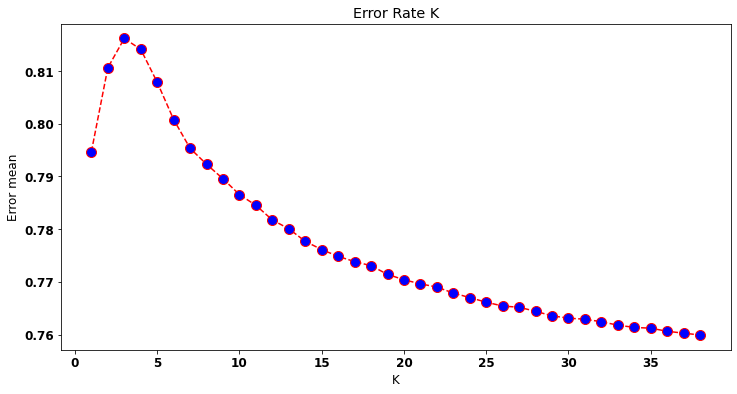

In [59]:
plt.figure(figsize=(12,6))
plt.plot(range(1,len(k)),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

#### Cause this model still has high error rate, I decide to change machine learning model

#### Decision Tree

In [65]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [66]:
y_pred_tree = clf.predict(X_test)

In [67]:
print(metrics.accuracy_score(y_test, y_pred_tree))  

0.27001134329174126


# Try df with differenct feature

In [94]:
df2 = pd.read_csv('data/train.csv')

In [95]:
# function to convert datetime to become new feature
def convert_datetime(df):
    df['Dates'] = pd.to_datetime(df['Dates'])
    df['Date'] = df['Dates'].dt.date
    df['Hour'] = df['Dates'].dt.hour
    df['Minute'] = df['Dates'].dt.minute
    df['DayOfWeek'] = df['Dates'].dt.weekday
    df['Month'] = df['Dates'].dt.month
    df['Year'] = df['Dates'].dt.year
    df['Block'] = df['Address'].str.contains('block', case=False)

    
    return df

In [96]:
df2 = convert_datetime(df2)

In [97]:
if 'Address' in df2:
    df2 = df2.drop(['Address'], axis=1)
if 'Dates' in df2:
    df2 = df2.drop(['Dates'], axis=1)
if 'Date' in df2:
    df2 = df2.drop(['Date'], axis=1)
if 'Year' in df2:
    df2 = df2.drop(['Year'], axis=1)

df2.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,Hour,Minute,Month,Block
0,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599,23,53,5,False
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599,23,53,5,False
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",-122.424363,37.800414,23,33,5,False
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,-122.426995,37.800873,23,30,5,True
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,-122.438738,37.771541,23,30,5,True


In [98]:
df_col = ['Category','PdDistrict','Descript','Resolution']
le = LabelEncoder()
for i in df_col:
    df2[i] = le.fit_transform(df2[i])

In [100]:
df2.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,Hour,Minute,Month,Block
0,37,866,2,4,0,-122.425892,37.774599,23,53,5,False
1,21,810,2,4,0,-122.425892,37.774599,23,53,5,False
2,21,810,2,4,0,-122.424363,37.800414,23,33,5,False
3,16,404,2,4,11,-122.426995,37.800873,23,30,5,True
4,16,404,2,5,11,-122.438738,37.771541,23,30,5,True


In [101]:
X = df2.drop(['Category'],axis=1)
X.head()

,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,Hour,Minute,Month,Block
0,866,2,4,0,-122.425892,37.774599,23,53,5,False
1,810,2,4,0,-122.425892,37.774599,23,53,5,False
2,810,2,4,0,-122.424363,37.800414,23,33,5,False
3,404,2,4,11,-122.426995,37.800873,23,30,5,True
4,404,2,5,11,-122.438738,37.771541,23,30,5,True


In [102]:
y = df2['Category']
y.head()

0    37
1    21
2    21
3    16
4    16
Name: Category, dtype: int32

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [105]:
model = KNeighborsClassifier(n_neighbors=len(k))
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=39)

In [106]:
y_pred = model.predict(X_test)

In [107]:
print(metrics.accuracy_score(y_test, y_pred))

0.9297809241366115


## Conclusion: There are many things to tune in model to produce the best machine learning model. Tuning Feature is necessary too. My model result is good cause There is 'Descript' and 'Resolution' feature that has strong correlation to Category (output/y)